# Heartwood
> Supervised metric and not metric space learning methods for multiple purposes in Machine Learning

## What is it for?

- [X] supervised similarity matching
- [X] nomparametric density estimation
- [X] ensemble learning

## Install

`pip install your_project_name`

## How to use

In [3]:
#hide
import sys
sys.path.append('..')

In [4]:
import seaborn as sns
from sklearn.datasets import fetch_california_housing

from heartwood.kernel import JaccardForestKernel, MLPKernel, DiscretizedTargetKernel, make_bimodal_assymetric_regression

..\heartwood\utils.py:20: UserWarning: could not load sparse_dot_topn: No module named 'sparse_dot_topn'
  warn(f'could not load sparse_dot_topn: {e}')


In [5]:
X_bimodal, y_bimodal = make_bimodal_assymetric_regression(10_000)

In [6]:
housing = fetch_california_housing(as_frame = True)['frame']

In [7]:
numerical_cols = housing.columns[:-1]
target_col = housing.columns[-1]

In [8]:
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


c:\users\user ambev\desktop\mypackages\heartwood\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedHouseVal', ylabel='Density'>

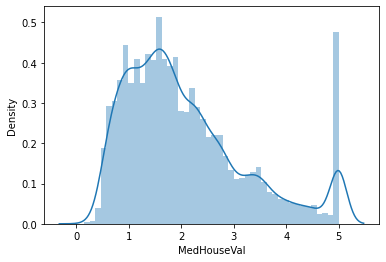

In [9]:
sns.distplot(housing.iloc[:,-1])

# JaccardForestKernel
> uses forest node embeddings and jaccard similarity to sample points

In [60]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split

learner = JaccardForestKernel(
    RandomForestRegressor(n_jobs = -1),
    fit_neighbors_index = True,
    verbose = True
)

In [61]:
housing_train, housing_test = train_test_split(housing, train_size = 0.8)

In [62]:
learner.fit(
    housing_train[numerical_cols],
    housing_train[target_col],
    save_values = housing_train
)

JaccardForestKernel(estimator=RandomForestRegressor(n_jobs=-1), verbose=True)

In [63]:
queries = learner.query(housing_test[numerical_cols])

kNN time total=1.645799 (sec), per query=0.000399 (sec), per query adjusted for thread number=0.001595 (sec)


c:\users\user ambev\desktop\mypackages\heartwood\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\user ambev\desktop\mypackages\heartwood\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


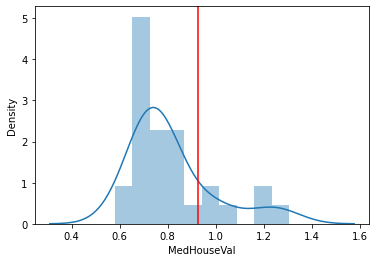

In [91]:
import numpy as np
import matplotlib.pyplot as plt

idx = np.random.choice(len(housing_test))
q = queries[0][idx]
q['similarity'] = queries[1][idx]

sns.distplot(q[target_col])
plt.axvline(housing_test.iloc[idx][target_col], color = 'r')


In [92]:
q[:10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,similarity
2552,2.2227,30.0,5.278552,1.019499,990.0,2.757660,40.77,-124.17,0.813,0.907104
2648,2.2357,30.0,5.152406,1.050802,996.0,2.663102,40.50,-124.10,0.723,0.913043
2636,2.0938,39.0,5.594340,1.122642,539.0,2.542453,40.59,-124.15,0.796,0.924731
2575,2.2478,31.0,5.123810,1.100000,1259.0,2.997619,40.80,-124.13,0.811,0.924731
19788,2.4792,26.0,6.129121,1.156593,987.0,2.711538,40.71,-122.95,0.888,0.941799
2650,2.3947,38.0,5.536160,1.062344,1041.0,2.596010,40.44,-124.09,0.705,0.947368
19763,2.2500,30.0,5.861862,1.192192,961.0,2.885886,40.02,-122.18,0.682,0.963731
2662,2.0870,33.0,6.141975,1.216049,1221.0,2.512346,40.12,-123.82,0.824,0.969072
18794,2.1250,22.0,6.856688,1.468153,903.0,2.875796,40.40,-122.76,1.232,0.969072
1860,2.1336,19.0,5.893993,1.144876,841.0,2.971731,41.92,-124.16,0.750,0.974359


# DiscretizedTargetKernel
> conditional target distribution could be bimodal, making regular regression faill. discretizing and running a classification might help

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [97]:
disc_learner = DiscretizedTargetKernel(
    estimator = make_pipeline(RobustScaler(), LogisticRegression()),
    n_bins = 15,
    strategy = 'uniform'
)


In [99]:
disc_learner.fit(
    housing_train[numerical_cols],
    housing_train[[target_col]],
    save_values = housing_train
)

c:\users\user ambev\desktop\mypackages\heartwood\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\user ambev\desktop\mypackages\heartwood\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


DiscretizedTargetKernel(estimator=Pipeline(steps=[('robustscaler',
                                                   RobustScaler()),
                                                  ('logisticregression',
                                                   LogisticRegression())]),
                        n_bins=15, strategy='uniform')

In [100]:
disc_queries = disc_learner.query(housing_test[numerical_cols])

c:\users\user ambev\desktop\mypackages\heartwood\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user ambev\desktop\mypackages\heartwood\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


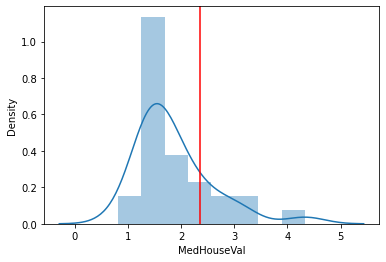

In [148]:
idx = np.random.choice(len(housing_test))
q = disc_queries[0][idx]
q['kldivergence'] = disc_queries[1][idx]

sns.distplot(q[target_col])
plt.axvline(housing_test.iloc[idx][target_col], color = 'r')


In [149]:
q[:10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,kldivergence
12947,4.8661,24.0,6.358456,1.053309,1336.0,2.455882,38.64,-121.28,1.862,0.002280
19666,4.6010,34.0,6.320329,0.979466,1226.0,2.517454,37.51,-120.83,1.500,0.002638
16450,4.1190,38.0,5.506876,0.982318,1223.0,2.402750,38.14,-121.28,1.288,0.003778
12731,5.0508,32.0,7.575688,1.100917,1185.0,2.717890,38.59,-121.36,2.257,0.003865
20559,4.7222,30.0,6.424691,0.990123,981.0,2.422222,38.67,-121.79,1.672,0.004230
12727,4.4643,35.0,5.710059,0.970414,805.0,2.381657,38.60,-121.36,1.330,0.004297
1534,4.2625,37.0,5.925795,0.950530,689.0,2.434629,37.89,-122.05,3.106,0.004309
19057,4.2813,33.0,6.340426,1.117021,212.0,2.255319,38.13,-121.84,0.813,0.004316
18894,4.0938,37.0,5.979592,1.046382,1325.0,2.458256,38.13,-122.24,1.269,0.005845
2040,4.9196,27.0,6.184783,0.906522,1219.0,2.650000,36.73,-119.67,1.179,0.006963
